# Assignment 10: Breast cancer gene expression analysis

## Modules and packages import

In [1]:
import pandas as pd
from scipy.stats import zscore, ttest_ind
from statsmodels.stats.multitest import multipletests
import gseapy as gp
import numpy as np
from gseapy import barplot, dotplot, heatmap
import matplotlib.pyplot as plt

## Dataset import and preprocessing

In [2]:
df = pd.read_csv('dataset_breast_cancer.txt', sep='\t', index_col='ID_REF').transpose()
df  
#We import the complete dataset, from which we will sample just data referring to healthy or breast cancer people

ID_REF,100002,100003,100027,100036,100037,100039,100044,100045,100051,100052,...,10713472,10713880,10713947,10714494,10715276,10715317,10715552,10715690,10715781,10715908
GSM290763,13.422506,7.350945,8.178899,11.923099,12.809180,9.125464,10.624943,8.099086,8.639951,8.903277,...,8.291419,10.441818,7.613034,12.118979,7.654639,9.722318,16.142613,10.677725,12.001682,7.370101
GSM290764,13.780101,6.499586,7.575710,11.484546,12.754843,7.117874,7.789392,9.247552,7.760204,7.417160,...,10.310325,9.530774,7.052968,12.213755,8.261598,10.103332,16.122971,11.534957,11.298948,9.204856
GSM290765,15.062165,9.109690,8.880089,11.822615,13.807391,9.777046,8.087078,9.007773,7.731535,7.699856,...,9.584304,7.438050,8.530162,12.144980,6.978764,9.143822,16.666508,11.459627,9.507795,10.344573
GSM290766,13.148520,8.520583,7.696917,12.535856,11.997358,7.766018,9.022442,9.180375,7.645393,8.527599,...,8.543886,10.103882,8.031094,11.855796,8.562418,10.266450,16.183008,10.366325,12.302811,9.927861
GSM290767,14.132942,8.594196,7.405297,10.624943,13.604827,10.538310,7.541922,7.171625,6.779122,8.366277,...,10.021877,9.469259,8.566389,12.210368,5.284179,10.423989,17.409784,11.934193,10.640237,9.766645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM290820,14.835224,8.339718,7.695143,10.665347,13.814970,9.456169,8.363736,7.983704,8.110529,8.942591,...,9.763001,8.894234,8.433577,11.796304,9.454508,9.046134,16.881217,11.521516,9.433552,9.370892
GSM290821,14.814234,8.017298,8.801931,10.104682,13.650664,10.642495,6.845055,7.938469,9.451076,7.174347,...,10.172256,7.865130,8.424459,12.164485,7.249902,9.688956,17.149760,11.740188,9.838539,9.302903
GSM290822,14.397616,8.558820,9.520554,9.866795,13.529753,9.769843,7.891491,7.473685,7.700255,9.204245,...,10.514198,9.168202,8.162785,11.997358,7.599954,10.852385,16.965637,11.304308,9.778815,11.096939
GSM290823,15.268965,7.574579,7.756522,9.688699,14.372324,10.985775,7.384741,6.822938,7.771283,7.876163,...,9.766561,8.882471,8.695544,12.061112,7.594228,9.535737,16.441746,11.551248,8.290506,9.100522


In [3]:
df_health = df.iloc[-9:,:]
df_health  #Dataframe with just healthy people

ID_REF,100002,100003,100027,100036,100037,100039,100044,100045,100051,100052,...,10713472,10713880,10713947,10714494,10715276,10715317,10715552,10715690,10715781,10715908
GSM290816,13.710818,6.892902,8.711001,11.998301,12.888501,8.875158,7.950999,7.536447,7.547635,8.083784,...,8.185244,7.615529,8.865868,11.005292,7.691663,9.456169,16.624669,11.643177,10.737178,9.864491
GSM290817,14.905733,5.663721,7.370765,10.746211,13.683590,10.629111,8.462847,8.223309,7.460839,8.047821,...,8.401635,9.332863,7.781298,11.566280,8.103638,9.060828,16.219681,11.168915,9.639253,8.276696
GSM290818,13.093811,8.082162,7.616559,11.958278,12.248943,7.992173,7.788214,7.604562,7.739810,7.399937,...,9.069586,9.288055,7.528501,11.753377,7.085317,10.170410,16.219681,11.690165,10.567470,8.454736
GSM290819,14.740331,8.918132,7.724920,9.851807,14.121267,9.555641,7.718085,7.276954,7.883154,7.812956,...,10.182163,9.102335,7.011307,11.946573,8.608208,10.328690,16.949791,11.823872,9.191861,8.743873
GSM290820,14.835224,8.339718,7.695143,10.665347,13.814970,9.456169,8.363736,7.983704,8.110529,8.942591,...,9.763001,8.894234,8.433577,11.796304,9.454508,9.046134,16.881217,11.521516,9.433552,9.370892
GSM290821,14.814234,8.017298,8.801931,10.104682,13.650664,10.642495,6.845055,7.938469,9.451076,7.174347,...,10.172256,7.865130,8.424459,12.164485,7.249902,9.688956,17.149760,11.740188,9.838539,9.302903
GSM290822,14.397616,8.558820,9.520554,9.866795,13.529753,9.769843,7.891491,7.473685,7.700255,9.204245,...,10.514198,9.168202,8.162785,11.997358,7.599954,10.852385,16.965637,11.304308,9.778815,11.096939
GSM290823,15.268965,7.574579,7.756522,9.688699,14.372324,10.985775,7.384741,6.822938,7.771283,7.876163,...,9.766561,8.882471,8.695544,12.061112,7.594228,9.535737,16.441746,11.551248,8.290506,9.100522
GSM290824,15.001767,8.250282,8.652816,10.023413,14.179916,10.127081,7.878391,7.776379,9.301350,7.241005,...,9.190938,8.503289,7.481404,11.845281,7.408495,9.598420,16.845547,12.147251,9.700231,11.599191


In [4]:
df_ill_1 = df.iloc[29:38,:] 
df_ill_2 = df.iloc[[44,49],:]
df_ill = pd.concat((df_ill_1, df_ill_2))
df_ill  #Dataset with just breast cancer people

ID_REF,100002,100003,100027,100036,100037,100039,100044,100045,100051,100052,...,10713472,10713880,10713947,10714494,10715276,10715317,10715552,10715690,10715781,10715908
GSM290792,13.783817,7.894258,7.836896,11.556448,13.296613,9.808581,8.411719,7.831912,7.760311,8.393730,...,9.716142,9.561976,8.847066,12.083454,7.325629,10.257842,16.975637,11.864794,10.520180,10.913469
GSM290793,14.494117,8.974201,8.454090,9.939125,13.804273,10.497013,7.647509,8.688864,7.854128,7.523967,...,8.596880,8.743873,7.884095,12.179391,7.986777,9.755269,16.630226,11.887620,9.655440,9.080849
GSM290794,13.665953,7.501625,7.278090,9.881257,13.383527,9.261186,8.182199,8.105078,7.707222,8.101607,...,8.478933,7.813959,8.957044,11.905264,7.278730,10.143787,16.378968,12.334644,10.128955,11.447662
GSM290795,14.300739,7.200073,10.258611,10.711247,13.520033,10.150032,9.329694,7.793425,7.616146,6.122135,...,10.312558,7.819357,8.585799,12.238435,7.469507,10.289238,17.075447,11.750553,9.621316,10.624943
GSM290796,13.983886,7.633821,7.134759,10.251259,13.151941,8.837736,7.437105,7.650994,8.994013,8.454090,...,8.848244,8.391254,7.881447,12.438635,8.713046,10.296148,16.868630,11.692572,10.847043,9.937312
GSM290797,14.278781,7.597492,6.972344,11.385409,13.952971,9.372846,7.572322,8.198980,5.796469,8.626830,...,10.169555,8.859554,10.351108,11.777696,8.004270,9.927231,16.602697,11.770852,10.529190,8.629565
GSM290798,14.484616,7.544880,8.021632,11.025483,14.027703,10.217827,8.433729,8.415782,7.821662,8.449017,...,8.715933,7.808374,7.967301,11.454031,8.248335,10.926243,16.383979,11.793121,10.488346,11.264579
GSM290799,14.269023,7.886140,8.680602,9.983204,13.500088,9.915698,7.422121,8.232527,6.105773,8.972284,...,9.650487,9.119511,8.938449,11.914243,7.232726,10.346964,17.047605,11.785119,10.357344,9.754022
GSM290800,13.958387,7.377937,8.281709,11.062754,13.511526,9.133993,8.156851,9.386527,7.196282,7.830803,...,10.213736,8.658698,9.445913,12.148274,8.022025,9.926582,16.862602,11.528524,10.634424,11.328658
GSM290807,14.731631,7.292684,7.531574,9.735370,13.945415,10.044735,7.083466,8.140264,7.210502,7.964978,...,10.321017,8.428890,7.591398,12.150382,7.318477,10.152613,16.784959,11.900781,10.495666,10.981432


In [5]:
df_tot = pd.concat((df_health, df_ill))  #Complete dataset: healthy + breast cancer people

In [6]:
df_tot.isna().sum().sum()  #We look for NaN in the dataset

0

#### There are no NaN in our dataset

In [7]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, GSM290816 to GSM290812
Columns: 32878 entries, 100002 to 10715908
dtypes: float64(32878)
memory usage: 5.0+ MB


In [8]:
#We import now a series which links gene names with they correspondent symbol, which will help us 
#in subsequent analysis

names = pd.read_csv('dataset_gene_name.txt', sep='\t', index_col='ID', low_memory=False).loc[:,'Gene symbol']
names

ID
156427      NaN
139282    GAP43
131316     GPHN
235751      NaN
696770      NaN
          ...  
711429      NaN
711856      NaN
712856      NaN
714309      NaN
716393      NaN
Name: Gene symbol, Length: 32878, dtype: object

In [9]:
names.info()

<class 'pandas.core.series.Series'>
Int64Index: 32878 entries, 156427 to 716393
Series name: Gene symbol
Non-Null Count  Dtype 
--------------  ----- 
17916 non-null  object
dtypes: object(1)
memory usage: 513.7+ KB


In [10]:
#We now change column names (gene names) in our dataset with the correspondent gene symbol in the series "names"
#We discard columns of the dataset which do not have a correspondet name in "names"

column_names = []
mask = names.isna()
for col in df_tot.columns:
    if mask[col]:
        df_tot.drop(columns = col, inplace=True)
    else:
        column_names.append(names[col])

df_tot.columns=column_names
df_tot

,ZKSCAN8,ZNF532,UBE2I,ANAPC7,CAMK1G,EID3,EMC6,ZMYND12,APOBEC3F,EREG,...,RP1L1,ZNF678,SCHIP1,OR2T1,SH2D4B,LILRB2,FAM170A,CUX2,LIN9,MAP6
GSM290816,8.711001,11.998301,12.888501,8.875158,8.083784,9.526388,13.524342,7.816948,9.270313,8.178023,...,9.476331,10.594055,7.819889,7.079614,7.686465,18.273273,8.075330,8.785462,7.615529,10.737178
GSM290817,7.370765,10.746211,13.683590,10.629111,8.047821,9.767217,13.734776,8.835665,11.061831,8.031646,...,9.203081,9.550889,8.393537,8.772018,8.044503,17.291196,7.669113,7.152983,9.332863,9.639253
GSM290818,7.616559,11.958278,12.248943,7.992173,7.399937,9.875525,13.473040,8.325490,9.554910,7.872808,...,8.219204,11.007826,7.302278,9.167173,8.558747,18.316886,7.481784,9.335869,9.288055,10.567470
GSM290819,7.724920,9.851807,14.121267,9.555641,7.812956,10.055975,13.521172,7.852051,9.804600,7.580368,...,7.706708,10.136614,7.871405,7.788657,7.608933,17.940482,7.675535,10.409149,9.102335,9.191861
GSM290820,7.695143,10.665347,13.814970,9.456169,8.942591,10.196694,13.256555,8.265839,9.913469,7.951397,...,7.793898,10.148575,6.087737,7.628597,8.781164,17.966733,6.814486,9.216344,8.894234,9.433552
GSM290821,8.801931,10.104682,13.650664,10.642495,7.174347,8.443850,13.360218,8.249108,8.759114,8.157565,...,7.210114,8.953207,8.751703,9.764340,8.704036,18.716765,6.923515,9.058786,7.865130,9.838539
GSM290822,9.520554,9.866795,13.529753,9.769843,9.204245,9.119734,13.631693,9.086685,9.604065,7.946977,...,7.313767,11.490777,7.175653,8.437295,8.517987,17.988050,9.520988,9.673355,9.168202,9.778815
GSM290823,7.756522,9.688699,14.372324,10.985775,7.876163,9.606982,13.314560,8.079909,10.569335,7.643912,...,8.588011,9.359134,7.824058,7.820237,8.148928,18.273273,7.388638,8.866602,8.882471,8.290506
GSM290824,8.652816,10.023413,14.179916,10.127081,7.241005,9.577288,13.731312,7.512735,10.023994,7.339665,...,8.417735,9.828095,7.787604,7.107691,8.091075,17.609236,7.759362,8.881503,8.503289,9.700231
GSM290792,7.836896,11.556448,13.296613,9.808581,8.393730,9.142067,12.965830,8.936077,10.720192,9.983204,...,7.426869,9.758695,7.745713,8.150235,8.165984,18.771669,7.331735,9.821140,9.561976,10.520180


In [11]:
#Finally we separate again our dataset in the healthy and ill patients part

df_health = df_tot.iloc[:9,:]
df_ill = df_tot.iloc[9:,:]

#### In this section we look for outliers in our data using the z-score

In [12]:
# mean of abs(zscore) for every sample

zscore(df_tot).abs().mean(axis=1)

GSM290816    0.949112
GSM290817    1.040582
GSM290818    0.836374
GSM290819    0.671621
GSM290820    0.836908
GSM290821    0.723389
GSM290822    0.827138
GSM290823    0.829857
GSM290824    0.714762
GSM290792    0.879439
GSM290793    0.796275
GSM290794    0.818664
GSM290795    0.667208
GSM290796    0.852033
GSM290797    0.831959
GSM290798    0.868633
GSM290799    0.706857
GSM290800    0.631493
GSM290807    0.685736
GSM290812    0.730270
dtype: float64

In [14]:
#Find columns with at least one sample with abs(z-score) > 3

df_tot.columns[zscore(df_tot)[zscore(df_tot).abs() > 3].sum(axis=0) > 0]

Index(['LCA5', 'PCDH20', 'FAM219B', 'PCF11', 'INSL4', 'LRRC39', 'LAMA4',
       'MUC4', 'LGSN', 'ECM2',
       ...
       'C3orf35', 'DNAH12', 'DEFB105A', 'CNOT1', 'KRTAP19-4', 'EYS', 'KANK4',
       'OR5K1', 'C15orf53', 'TAS2R20'],
      dtype='object', length=633)

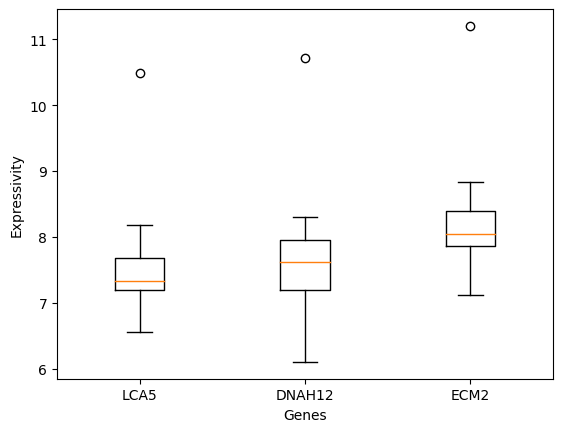

In [56]:
#Boxplot of some genes with outliers

fig, ax = plt.subplots()
ax.boxplot(df_tot[['LCA5','DNAH12', 'ECM2']], labels=['LCA5','DNAH12', 'ECM2'])
ax.set_xlabel('Genes')
ax.set_ylabel('Expressivity')
#plt.show()
plt.savefig('boxplot_genes.png')

## Statistical analysis

In [22]:
#First of all we set a threshold value for the type I error

alpha = 0.05  

In [23]:
#We perform a t-test t find differently expressed genes among healthy and ill people

stat, p_values = ttest_ind(df_ill.values, df_health.values)

#### When stat is positive: tumor patients have over-expressed genes

In [24]:
#Number of differentially expressed genes with statistical significance (we choose to set type I error alpha = 0.05)

len(p_values[p_values<alpha])  

2828

In [25]:
#We divide differentially expressed genes in overexpressed and underexpressed (according to the t-test)

gene_signif = df_tot.columns[p_values<0.05]  #symbols of differentially expressed genes
stat_signif = stat[p_values<0.05]  #t-test statistics of differentially expressed genes
overexpr_gene = gene_signif[stat_signif>0]  #when t-test statistic is positive: overexpressed genes in ill patients
underexpr_gene = gene_signif[stat_signif<0]  #when t-test statistic is negative: underexpressed genes in ill patients
len(overexpr_gene),len(underexpr_gene)   #number of over and under expressed genes after p-values correction

(1171, 1657)

In [26]:
#We coorect p-values for multiple testing applying the Hochberg-Benjamini procedure

rej, p_adj, _, _ = multipletests(p_values, alpha = alpha, method='fdr_bh')

In [27]:
#Number of differentially expressed genes with statistical significance after correcting p-values for multiple 
#testing (we choose to set type I error alpha = 0.05)

len(p_adj[p_adj<alpha])

433

In [28]:
#We divide differentially expressed genes in overexpressed and underexpressed (according to the t-test)

diff_gen = df_tot.columns[rej]  #symbols of differentially expressed genes
diff_stat = stat[p_adj<alpha]  #t-test statistics of differentially expressed genes
gene_up = list(diff_gen[diff_stat>0])  #when t-test statistic is positive: overexpressed genes in ill patients
gene_down = list(diff_gen[diff_stat<0])  #when t-test statistic is negative: underexpressed genes in ill patients
(len(gene_up), len(gene_down))  #number of over and under expressed genes after p-values correction

(92, 341)

## Over expression enrichment analysis

### Under-expressed genes

In [35]:
#We perform over-representation analysis using the python package gseapy
#We start with underexpressed genes

enr_down = gp.enrich(gene_list=gene_down, 
                gene_sets=['BioCarta_2016', 'BioPlanet_2019', 'WikiPathway_2021_Human',\
                           'Elsevier_Pathway_Collection', 'KEGG_2021_Human', 'Panther_2016', 'Reactome_2022',\
                           'GO_Biological_Process_2021'], 
                background=df_tot.columns)

#REM: by setting a backgrounf value in the function we are giving the function the complex of genes we have 
#considered in our statistical analysis. The goal is to obtain more accurate values for the statistic of the 
#over-representation test performed by the function "enrich"

#We now look for pathways which have a significant statistical over-representation
enr_down.results[enr_down.results['Adjusted P-value']<alpha].sort_values(by=['Adjusted P-value'])

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1550,Reactome_2022,Metabolism Of RNA R-HSA-8953854,55/666,6.971826e-24,5.570489e-21,0,0,6.452752,344.061811,EIF4A2;POP5;HBS1L;RPL30;RPL31;CWC27;RPL7;RPS17...
1551,Reactome_2022,Translation R-HSA-72766,36/281,3.933964e-22,1.571619e-19,0,0,10.019678,493.842107,EIF4A2;SRP19;RPL30;RPL31;MRPS14;RPL36A;MRPL17;...
47,BioPlanet_2019,Translation,27/151,1.038130e-20,6.218399e-18,0,0,14.482801,666.415680,EIF4A2;SRP19;RPL30;RPL31;RPL36A;SRP14;RPL7;RPS...
2349,GO_Biological_Process_2021,cotranslational protein targeting to membrane ...,22/94,8.968832e-20,1.609905e-16,0,0,20.036882,878.776505,SRP19;RPL30;RPL41;RPL21;RPS7;RPL31;RPL23;RPL36...
2351,GO_Biological_Process_2021,protein targeting to ER (GO:0045047),22/103,7.577069e-19,4.533613e-16,0,0,17.802387,742.786605,SRP19;RPL30;RPL41;RPL21;RPS7;RPL31;RPL23;RPL36...
...,...,...,...,...,...,...,...,...,...,...
1681,Reactome_2022,Downregulation Of TGF-beta Receptor Signaling ...,3/26,8.101664e-03,4.867090e-02,0,0,8.062346,38.825726,PPP1CB;SMAD2;PPP1CC
1682,Reactome_2022,Insulin Receptor Recycling R-HSA-77387,3/26,8.101664e-03,4.867090e-02,0,0,8.062346,38.825726,ATP6V1G1;ATP6V1E1;ATP6V1D
1683,Reactome_2022,FCERI Mediated NF-kB Activation R-HSA-2871837,5/78,8.390046e-03,4.933773e-02,0,0,4.249610,20.316149,PSMA3;PSMC6;PSMD14;PSMA2;SKP1
1684,Reactome_2022,Nuclear Events Mediated By NFE2L2 R-HSA-9759194,5/78,8.390046e-03,4.933773e-02,0,0,4.249610,20.316149,PSMA3;PSMC6;PSMD14;PSMA2;SKP1


In [39]:
#We plot the best results of over-representation analysis on under-expressed genes 

ax = dotplot(enr_down.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=3,
              figsize=(3,5),
              title = "UNDER EXPRESSED",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
              ofname='down_genes_dotlot.png'
             )

### Over-expressed genes

In [36]:
#We now perform over-representation analysis with over-expressed genes

enr_up = gp.enrich(gene_list=gene_up, 
                gene_sets=['BioCarta_2016', 'BioPlanet_2019', 'WikiPathway_2021_Human',\
                           'Elsevier_Pathway_Collection', 'KEGG_2021_Human', 'Panther_2016', 'Reactome_2022',\
                           'GO_Biological_Process_2021'], 
                background=df_tot.columns)

enr_up.results[enr_up.results['Adjusted P-value']<alpha].sort_values(by=['Adjusted P-value'])

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
745,Reactome_2022,Activation Of Gene Expression By SREBF (SREBP)...,4/42,0.000039,0.010383,0,0,24.042347,243.877579,HELZ2;FDPS;NFYA;CARM1
746,Reactome_2022,Formation Of Senescence-Associated Heterochrom...,3/17,0.000059,0.010383,0,0,48.445617,471.627237,HIRA;HMGA1;CABIN1
747,Reactome_2022,Regulation Of Cholesterol Biosynthesis By SREB...,4/55,0.000115,0.013401,0,0,17.902186,162.455222,HELZ2;FDPS;NFYA;CARM1
725,Panther_2016,TCA cycle Homo sapiens P00051,2/9,0.000722,0.014439,0,0,63.890851,462.157096,CS;ACO2
335,WikiPathway_2021_Human,Fluoroacetic acid toxicity WP4966,2/6,0.000304,0.029743,0,0,111.825843,905.802397,CS;ACO2
433,Elsevier_Pathway_Collection,Myeloid Cell Differentiation Block in Leukemia,3/25,0.000195,0.035669,0,0,30.816632,263.265573,CSF1R;SPI1;FLT3
616,KEGG_2021_Human,Glyoxylate and dicarboxylate metabolism,3/30,0.000338,0.036890,0,0,25.103535,200.606096,CS;AMT;ACO2


In [39]:
#We plot the best results of over-representation analysis on over-expressed genes 

ax = dotplot(enr_up.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=3,
              figsize=(3,5),
              title = "OVER EXPRESSED",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
              ofname='up_genes_dotlot.png'
             )

### All differentially expressed genes

In [37]:
enr_tot = gp.enrich(gene_list=list(diff_gen), 
                gene_sets=['BioCarta_2016', 'BioPlanet_2019', 'WikiPathway_2021_Human',\
                           'Elsevier_Pathway_Collection', 'KEGG_2021_Human', 'Panther_2016', 'Reactome_2022',\
                           'GO_Biological_Process_2021'], 
                background=df_tot.columns)

enr_tot.results[enr_tot.results['Adjusted P-value']<alpha].sort_values(by=['Adjusted P-value'])

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1839,Reactome_2022,Metabolism Of RNA R-HSA-8953854,58/666,8.437535e-21,7.534719e-18,0,0,5.129426,237.090276,EIF4A2;POP5;HBS1L;RPL30;RPL31;SMG7;CWC27;RPL7;...
1840,Reactome_2022,Translation R-HSA-72766,36/281,1.525355e-18,6.810709e-16,0,0,7.579690,310.951503,EIF4A2;SRP19;RPL30;RPL31;MRPS14;RPL36A;MRPL17;...
67,BioPlanet_2019,Translation,27/151,6.108237e-18,4.257441e-15,0,0,11.037361,437.486718,EIF4A2;SRP19;RPL30;RPL31;RPL36A;SRP14;RPL7;RPS...
2732,GO_Biological_Process_2021,cytoplasmic translation (GO:0002181),22/93,1.383530e-17,1.985341e-14,0,0,15.547123,603.528581,EIF4A2;RPL30;RPL41;RPL21;RPS7;RPL31;RPL23;RPL3...
2733,GO_Biological_Process_2021,cotranslational protein targeting to membrane ...,22/94,1.772626e-17,1.985341e-14,0,0,15.330406,591.316505,SRP19;RPL30;RPL41;RPL21;RPS7;RPL31;RPL23;RPL36...
...,...,...,...,...,...,...,...,...,...,...
1952,Reactome_2022,Transport Of SLBP Dependant Mature mRNA R-HSA-...,4/36,6.157601e-03,4.823454e-02,0,0,6.006450,30.573238,SLBP;NUP35;EIF4E;NUP37
2768,GO_Biological_Process_2021,regulation of ubiquitin protein ligase activit...,4/21,7.970941e-04,4.825651e-02,0,0,11.314930,80.726795,RAB1A;RPS7;RPL23;SKP1
1953,Reactome_2022,Cytoprotection By HMOX1 R-HSA-9707564,5/57,6.236425e-03,4.842719e-02,0,0,4.626989,23.492836,HELZ2;COX16;COX4I1;CARM1;COX7C
105,BioPlanet_2019,Messenger RNA splicing: major pathway,6/68,2.716345e-03,4.854597e-02,0,0,4.665950,27.568615,PABPN1;SF3B6;HNRNPA2B1;PAPOLA;DNAJC8;HNRNPC


In [39]:
#We plot results for all genes together

ax = dotplot(enr_tot.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=3,
              figsize=(3,5),
              title = "ALL GENES",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
              ofname='all_genes_dotlot.png'
             )

## Gene Set Enrichment Analysis (GSEA)

In [38]:
#In order to perform GSEA, we define the entire dataset, concatenating ill and healthy patients

df_gsea = pd.concat((df_ill, df_health))
df_gsea

,ZKSCAN8,ZNF532,UBE2I,ANAPC7,CAMK1G,EID3,EMC6,ZMYND12,APOBEC3F,EREG,...,RP1L1,ZNF678,SCHIP1,OR2T1,SH2D4B,LILRB2,FAM170A,CUX2,LIN9,MAP6
GSM290792,7.836896,11.556448,13.296613,9.808581,8.393730,9.142067,12.965830,8.936077,10.720192,9.983204,...,7.426869,9.758695,7.745713,8.150235,8.165984,18.771669,7.331735,9.821140,9.561976,10.520180
GSM290793,8.454090,9.939125,13.804273,10.497013,7.523967,9.362625,13.239098,9.572343,10.886928,8.181475,...,7.885363,8.961994,8.769891,8.552343,7.420828,18.545509,7.663930,7.601909,8.743873,9.655440
GSM290794,7.278090,9.881257,13.383527,9.261186,8.101607,8.923248,13.074373,7.928118,9.894150,7.895988,...,8.051473,9.812328,8.709778,8.041324,7.699717,19.076270,8.174980,9.359250,7.813959,10.128955
GSM290795,10.258611,10.711247,13.520033,10.150032,6.122135,9.998456,13.016399,7.187788,10.841216,8.695254,...,8.666089,11.738657,8.396363,8.904460,7.766847,18.194124,8.911766,9.294017,7.819357,9.621316
GSM290796,7.134759,10.251259,13.151941,8.837736,8.454090,8.966248,13.766642,8.211519,10.357897,8.672921,...,7.790092,11.562495,7.367434,8.760854,7.733277,17.982601,10.218124,9.800906,8.391254,10.847043
GSM290797,6.972344,11.385409,13.952971,9.372846,8.626830,9.633524,13.044780,8.346950,8.543487,8.645184,...,7.947785,10.729930,8.419690,7.562210,8.829405,17.888218,8.003113,9.642482,8.859554,10.529190
GSM290798,8.021632,11.025483,14.027703,10.217827,8.449017,8.911766,13.172426,7.812677,8.696229,8.896148,...,8.743675,10.147113,8.382042,8.969826,8.226455,18.100123,7.694913,8.780831,7.808374,10.488346
GSM290799,8.680602,9.983204,13.500088,9.915698,8.972284,9.030126,13.030929,8.346127,10.423708,9.205629,...,8.449144,10.461621,8.427326,8.588333,7.615233,17.923042,7.887946,9.362625,9.119511,10.357344
GSM290800,8.281709,11.062754,13.511526,9.133993,7.830803,9.405434,12.924767,8.198483,10.134095,9.619962,...,7.823325,9.908717,7.469684,9.132324,9.103808,18.325386,7.419842,10.236709,8.658698,10.634424
GSM290807,7.531574,9.735370,13.945415,10.044735,7.964978,9.830841,12.879289,8.155777,10.018769,9.216510,...,8.270849,10.547232,8.374836,9.283694,7.505329,18.756286,8.211897,10.056449,8.428890,10.495666


In [41]:
#Create a cls file for function gsea

groups = ['Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor',\
          'Tumor', 'Tumor', 'Tumor', 'Tumor', 'Tumor',' Health',\
          'Health', 'Health', 'Health', 'Health', 'Health', 'Health',\
          'Health', 'Health'] 

with open('gsea_names.cls', 'w') as cl:
    line = f'{len(groups)} 2 1 \n# Tumor Health\n' 
    cl.write(line) 
    cl.write(' '.join(groups) + '\n')


In [42]:
#We run GSEA using gseapy function gsea

gsea = gp.gsea(pd.DataFrame(df_gsea.values.transpose(), index=column_names),\
               gene_sets=['BioCarta_2016', 'BioPlanet_2019', 'WikiPathway_2021_Human',\
                           'Elsevier_Pathway_Collection', 'KEGG_2021_Human', 'Panther_2016', 'Reactome_2022',\
                           'GO_Biological_Process_2021'],\
               cls = 'gsea_names.cls',\
               method='t_test')

#REM: we specified to use t-test as a method to rank differentially expressed genes

2023-01-04 18:17:25,179 [WARNING] Dropping duplicated gene names, only keep the first values


In [29]:
#Show results of GSEA analysis dorte by Enrichment Score

gsea.res2d.sort_values(by='ES')

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
19,gsea,BioPlanet_2019__Gap junction assembly,-0.700288,-1.76966,0.003704,1.0,0.96,8/17,15.05%,GJD3;GJD4;GJA10;GJB2;GJD2;GJB5;GJB1;GJB4
0,gsea,Elsevier_Pathway_Collection__Gap Junction Asse...,-0.686635,-1.998346,0.0,0.401835,0.199,9/20,14.56%,GJB2;ADRB1;DRD2;MAPK3;DRD1;MAPK7;EGFR;MAPK1;GJB1
26,gsea,GO_Biological_Process_2021__focal adhesion ass...,-0.645322,-1.752192,0.004065,1.0,0.97,12/19,25.10%,TAOK2;TESK2;TRIP6;SRC;PIP5K1A;BCR;DLC1;ACTN3;R...
392,gsea,Reactome_2022__FOXO-mediated Transcription Of ...,-0.641668,-1.544623,0.044747,1.0,1.0,7/15,12.49%,NFYA;FOXO3;EP300;NFYC;BBC3;CREBBP;CITED2
221,gsea,BioPlanet_2019__HDL-mediated lipid transport,-0.641554,-1.612264,0.021442,1.0,1.0,7/15,13.73%,CETP;APOE;APOA1;ABCG1;APOC3;APOC2;LCAT
...,...,...,...,...,...,...,...,...,...,...
32,gsea,Reactome_2022__Mitochondrial Translation Elong...,0.722428,1.737658,0.007449,0.557684,0.989,53/78,17.38%,MRPL17;MRPL58;MRPS18C;MRPL3;MRPS21;MRPL51;MRPL...
139,gsea,GO_Biological_Process_2021__cytoplasmic transl...,0.736552,1.650001,0.016129,0.304517,1.0,10/18,15.87%,DENR;EIF4A2;EIF3D;EIF2B3;MCTS1;EIF4B;EIF5;EIF3...
57,gsea,Reactome_2022__SARS-CoV-2 Modulates Host Trans...,0.738381,1.713796,0.017476,0.413819,0.995,25/43,13.96%,SNRPG;SNRPE;SNRPD2;RPS17;RPS25;RPS3A;RPS20;RPS...
77,gsea,GO_Biological_Process_2021__mitochondrial elec...,0.749547,1.688987,0.009709,0.377778,0.999,10/16,14.92%,COX7C;COX4I1;COX6C;CYCS;NDUFA4;COX7B;COX7A2L;C...


In [50]:
# We look for one pathway we found with previous analysis

gsea.res2d[gsea.res2d['Term']=='Reactome_2022__Translation R-HSA-72766']

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
43,gsea,Reactome_2022__Translation R-HSA-72766,-0.652531,-1.757326,0.007921,0.343112,0.96,152/253,21.85%,RPL26;RPL21;MRPL17;RPS17;RPL41;RPL36A;RPL23;RP...


In [58]:
#We save in a file a plot showing the results of GSEA analysis on the pathway we choose

terms = gsea.res2d.Term
i = 43  #index of our pathway

gp.gseaplot(gsea.ranking, term=terms[i], **gsea.results[terms[i]], ofname='gsea_plot.png')

In [59]:
#We save in a file an heatmap showing the results of GSEA analysis on the pathway we choose

genes = gsea.res2d.Lead_genes[i].split(";")

ax = heatmap(df = gsea.heatmat.loc[genes], z_score=0, title=terms[i], figsize=(14,4), ofname='gsea_heatmap.png')